In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
BATCH_SIZE = 64
IMG_SIZE = (216, 128)
CLASSES = 50
LR = 1e-3
EPOCHS = 100

In [3]:
train_dataset = tf.keras.utils.image_dataset_from_directory('dataset/train',
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE,
                                                            color_mode='grayscale',
                                                            shuffle=True,
                                                            seed=42)

test_dataset = tf.keras.utils.image_dataset_from_directory('dataset/test',
                                                           batch_size=BATCH_SIZE,
                                                           image_size=IMG_SIZE,
                                                           color_mode='grayscale',
                                                           shuffle=False,
                                                           seed=42)

class_names = train_dataset.class_names
train_dataset = train_dataset.prefetch(tf.data.AUTOTUNE).cache()

Found 1800 files belonging to 50 classes.
Metal device set to: Apple M1
Found 200 files belonging to 50 classes.


2022-11-20 13:20:12.507306: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-20 13:20:12.507418: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [16]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(50, (5, 5), padding='valid', input_shape=(216, 128, 1), activation='relu'))
model.add(tf.keras.layers.MaxPool2D((2, 2)))
model.add(tf.keras.layers.Conv2D(50, (3, 3), padding='valid', activation='relu'))
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(CLASSES))

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(learning_rate=LR),
              metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 212, 124, 50)      1300      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 106, 62, 50)      0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 104, 60, 50)       22550     
                                                                 
 global_average_pooling2d_5   (None, 50)               0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_13 (Dense)            (None, 50)                2550      
                                                                 
Total params: 26,400
Trainable params: 26,400
Non-trai

In [19]:
mc = tf.keras.callbacks.ModelCheckpoint('flatten_best.h5', save_best_only=True)
history = model.fit(train_dataset, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=test_dataset, callbacks=[mc])

Epoch 1/100
29/29 [==============================] - 8s 256ms/step - loss: 1.1918 - accuracy: 0.6506 - val_loss: 1.8547 - val_accuracy: 0.5050
Epoch 2/100
29/29 [==============================] - 7s 250ms/step - loss: 1.1924 - accuracy: 0.6478 - val_loss: 1.8737 - val_accuracy: 0.4900
Epoch 3/100
29/29 [==============================] - 7s 247ms/step - loss: 1.1861 - accuracy: 0.6533 - val_loss: 1.9198 - val_accuracy: 0.4850
Epoch 4/100
29/29 [==============================] - 7s 254ms/step - loss: 1.1886 - accuracy: 0.6511 - val_loss: 1.8204 - val_accuracy: 0.5250
Epoch 5/100
29/29 [==============================] - 7s 251ms/step - loss: 1.1915 - accuracy: 0.6378 - val_loss: 1.7637 - val_accuracy: 0.5250
Epoch 6/100
29/29 [==============================] - 7s 247ms/step - loss: 1.1826 - accuracy: 0.6472 - val_loss: 1.8060 - val_accuracy: 0.5150
Epoch 7/100
29/29 [==============================] - 8s 263ms/step - loss: 1.1837 - accuracy: 0.6422 - val_loss: 1.7131 - val_accuracy: 0.5600

Epoch 58/100
29/29 [==============================] - 8s 260ms/step - loss: 0.9014 - accuracy: 0.7256 - val_loss: 1.6416 - val_accuracy: 0.5850
Epoch 59/100
29/29 [==============================] - 7s 256ms/step - loss: 0.8985 - accuracy: 0.7317 - val_loss: 1.7739 - val_accuracy: 0.5200
Epoch 60/100
29/29 [==============================] - 7s 253ms/step - loss: 0.9552 - accuracy: 0.7050 - val_loss: 1.5779 - val_accuracy: 0.6050
Epoch 61/100
29/29 [==============================] - 7s 258ms/step - loss: 0.9462 - accuracy: 0.7033 - val_loss: 1.5518 - val_accuracy: 0.5850
Epoch 62/100
29/29 [==============================] - 7s 257ms/step - loss: 0.8940 - accuracy: 0.7294 - val_loss: 1.4952 - val_accuracy: 0.6050
Epoch 63/100
29/29 [==============================] - 8s 271ms/step - loss: 0.8783 - accuracy: 0.7339 - val_loss: 1.5343 - val_accuracy: 0.6200
Epoch 64/100
29/29 [==============================] - 8s 275ms/step - loss: 0.8790 - accuracy: 0.7356 - val_loss: 1.4327 - val_accuracy:

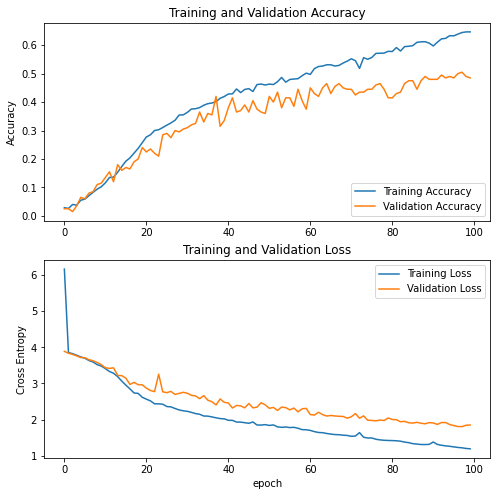

In [18]:
acc += history.history['accuracy']
val_acc += history.history['val_accuracy']

loss += history.history['loss']
val_loss += history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()